# Created by- Sambhav Srivastava
### Naive Bayes Classifier

**Import Dataset**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
dataset = pd.read_csv('C:\\Users\\Sambh\\Desktop\\Work\\Codes\\naive bayes\\bank-additional-full.csv', sep = ';')

In [5]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

**Cleaning Dataset**

In [6]:
dataset = dataset.rename(columns={'y': 'subscribed'})

In [7]:
print(dataset.duplicated().sum())

12


In [8]:
print(dataset[dataset.duplicated(keep=False)].iloc[:,:7])

       age          job   marital            education  default housing loan
1265    39  blue-collar   married             basic.6y       no      no   no
1266    39  blue-collar   married             basic.6y       no      no   no
12260   36      retired   married              unknown       no      no   no
12261   36      retired   married              unknown       no      no   no
14155   27   technician    single  professional.course       no      no   no
14234   27   technician    single  professional.course       no      no   no
16819   47   technician  divorced          high.school       no     yes   no
16956   47   technician  divorced          high.school       no     yes   no
18464   32   technician    single  professional.course       no     yes   no
18465   32   technician    single  professional.course       no     yes   no
20072   55     services   married          high.school  unknown      no   no
20216   55     services   married          high.school  unknown      no   no

In [9]:
dataset = dataset.drop_duplicates()

In [10]:
print(dataset.shape)

(41176, 21)


Check missing values

In [11]:
print('\033[1mNULL VALUES\033[0m\n'+ str(dataset.isnull().values.any()))

NULL VALUES
False


               no   yes
subscribed  36537  4639


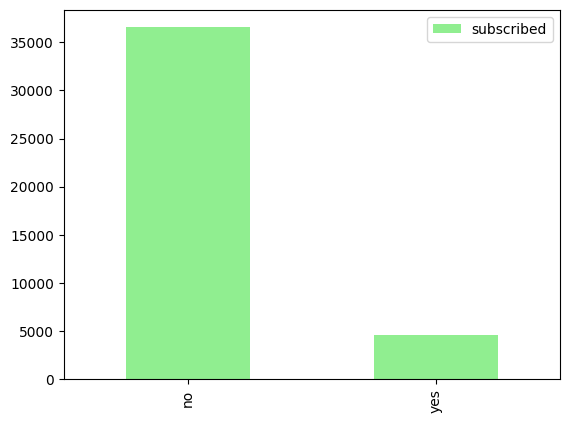

In [12]:
Subscribed = pd.DataFrame(dataset['subscribed'].value_counts())
print(Subscribed.T)
pd.DataFrame(dataset['subscribed'].value_counts()).plot(kind='bar', color='lightgreen')
plt.show()

**Data Preparation**

In [13]:
bins= [0,10,20,30,40,50,60,70,80,90,100]
labels = [0,1,2,3,4,5,6,7,8,9]
dataset.insert(1, 'agegroup', pd.cut(dataset['age'], bins=bins, labels=labels, right=False))
dataset = dataset.drop('age', axis=1)

In [14]:
categorical_columns = dataset.select_dtypes(include='object').columns

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in categorical_columns:
    dataset[i] = le.fit_transform(dataset[i]) 

In [16]:
print(dataset.head())

  agegroup  job  marital  education  default  housing  loan  contact  month  \
0        5    3        1          0        0        0     0        1      6   
1        5    7        1          3        1        0     0        1      6   
2        3    7        1          3        0        2     0        1      6   
3        4    0        1          1        0        0     0        1      6   
4        5    7        1          3        0        0     2        1      6   

   day_of_week  ...  campaign  pdays  previous  poutcome  emp.var.rate  \
0            1  ...         1    999         0         1           1.1   
1            1  ...         1    999         0         1           1.1   
2            1  ...         1    999         0         1           1.1   
3            1  ...         1    999         0         1           1.1   
4            1  ...         1    999         0         1           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  subscribed  
0        

In [17]:
X_train = dataset.iloc[:, :-1].values.astype('float')
y_train = dataset['subscribed'].values

In [18]:
from sklearn.preprocessing import StandardScaler
X_train = pd.DataFrame(StandardScaler().fit_transform(X_train))

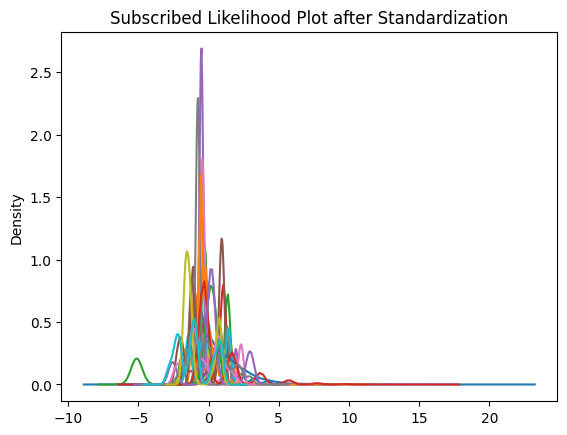

In [19]:
X_train[y_train == 1].plot(kind='density', ind=100, legend=False)
plt.title('Subscribed Likelihood Plot after Standardization')
plt.show()

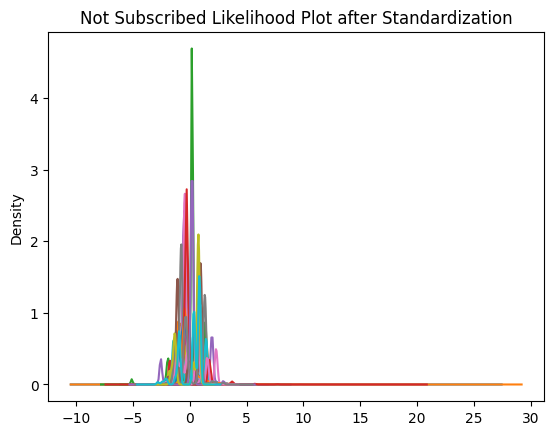

In [20]:
X_train[y_train == 0].plot(kind='density', ind=100, legend=False)
plt.title('Not Subscribed Likelihood Plot after Standardization')
plt.show()

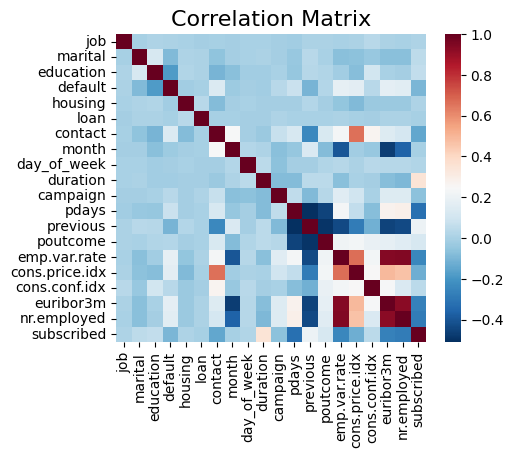

In [23]:
plt.figure(figsize=(5,4))
sns.heatmap(dataset.corr(method='spearman', numeric_only=True), cbar=True, cmap="RdBu_r")
plt.title("Correlation Matrix", fontsize=16)
plt.show()

In [24]:
correlation = X_train.corr(method='spearman').abs()
upper = correlation.where(np.triu(np.ones(correlation.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.40)]
X_train.drop(X_train[to_drop], axis=1, inplace=True)

In [25]:
print(X_train.shape)

(41176, 13)


In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.25, random_state=42)

In [27]:
from sklearn.naive_bayes import GaussianNB
gb = GaussianNB()
gb.fit(X_train, y_train)
pred = gb.predict(pd.DataFrame(X_test))

0.8738079987876639


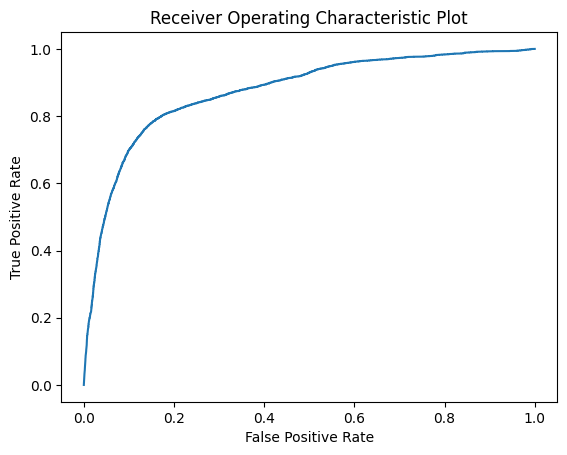

In [28]:
from sklearn.metrics import roc_curve, auc
gbprob = gb.predict_proba(X_train)[:,1]
fpr, tpr, thr = roc_curve(y_train, gbprob)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Plot')
print(auc(fpr, tpr))

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print('Accuracy score of Gaussian Naive Bayes:', accuracy_score(y_test, pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, pred))
print('Classification Report:\n', classification_report(y_test, pred))

Accuracy score of Gaussian Naive Bayes: 0.8985816980765494
Confusion Matrix:
 [[8712  382]
 [ 662  538]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.94      9094
           1       0.58      0.45      0.51      1200

    accuracy                           0.90     10294
   macro avg       0.76      0.70      0.73     10294
weighted avg       0.89      0.90      0.89     10294



---

### Contact Me-
#### Sambhavsrivastava2401@gmail.com

---